In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsRegressor
from util import evaluate

In [2]:
X_train = pd.read_parquet("./modelling_data/X_train.parquet")
y_train = pd.read_parquet("./modelling_data/y_train.parquet")["target"]
X_valid = pd.read_parquet("./modelling_data/X_validation.parquet")
y_valid = pd.read_parquet("./modelling_data/y_validation.parquet")["target"]
X_test = pd.read_parquet("./modelling_data/X_test.parquet")
y_test = pd.read_parquet("./modelling_data/y_test.parquet")["target"]

X_train = pd.concat([X_train, X_valid]).pct_change()[1:]
y_train_pct_change = pd.concat([y_train, y_valid]).pct_change()[1:]
X_test = pd.read_parquet("./modelling_data/X_test.parquet").pct_change()[1:]
y_test_pct_change = pd.read_parquet("./modelling_data/y_test.parquet")["target"].pct_change()[1:]

In [3]:
knn = KNeighborsRegressor(n_neighbors=15, weights="distance", n_jobs=-1)
knn.fit(X_train, y_train_pct_change)
y_pred_pct_change = knn.predict(X_test)
y_pred = y_test.shift()[1:]*(1 + y_pred_pct_change)

MAE = 4.7990559978559055
MSE = 70.34428776071515
RMSE = 8.387150157277212
MAPE = 0.037036605423006894
R^2 = 0.6864521472509559
Explained Variance Score = 0.6869124041439512

Residuals summary stats
╒═══════╤════════════╕
│ count │      14533 │
├───────┼────────────┤
│ mean  │   0.321338 │
├───────┼────────────┤
│ std   │    8.38128 │
├───────┼────────────┤
│ min   │   -60.8636 │
├───────┼────────────┤
│ 25%   │   -2.08572 │
├───────┼────────────┤
│ 50%   │ -0.0248514 │
├───────┼────────────┤
│ 75%   │    2.37506 │
├───────┼────────────┤
│ max   │     57.512 │
╘═══════╧════════════╛

Deviation from mean of residuals
╒════════════╤══════════╤════════════╕
│ Interval   │   Actual │   Expected │
╞════════════╪══════════╪════════════╡
│ μ ± σ      │  83.8437 │       68.2 │
├────────────┼──────────┼────────────┤
│ μ ± 2σ     │  93.0228 │       95.4 │
├────────────┼──────────┼────────────┤
│ μ ± 3σ     │  97.2752 │       99.7 │
╘════════════╧══════════╧════════════╛

Jarque-Bera Test on Resid

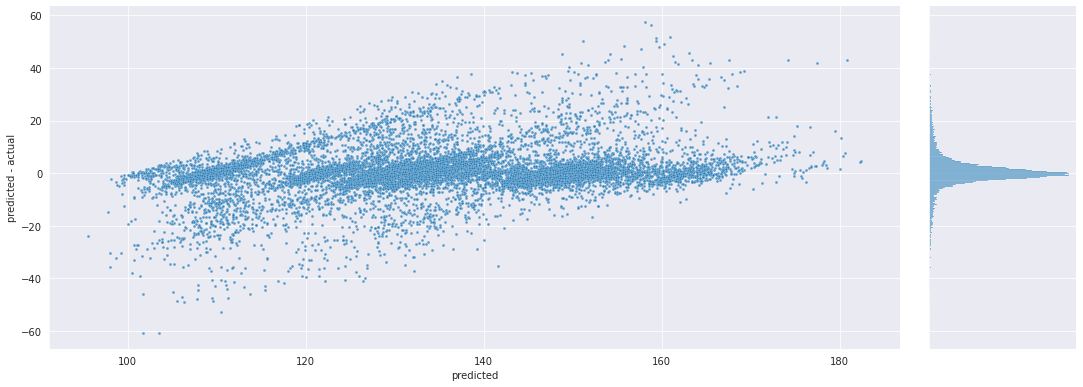

<Figure size 720x576 with 0 Axes>

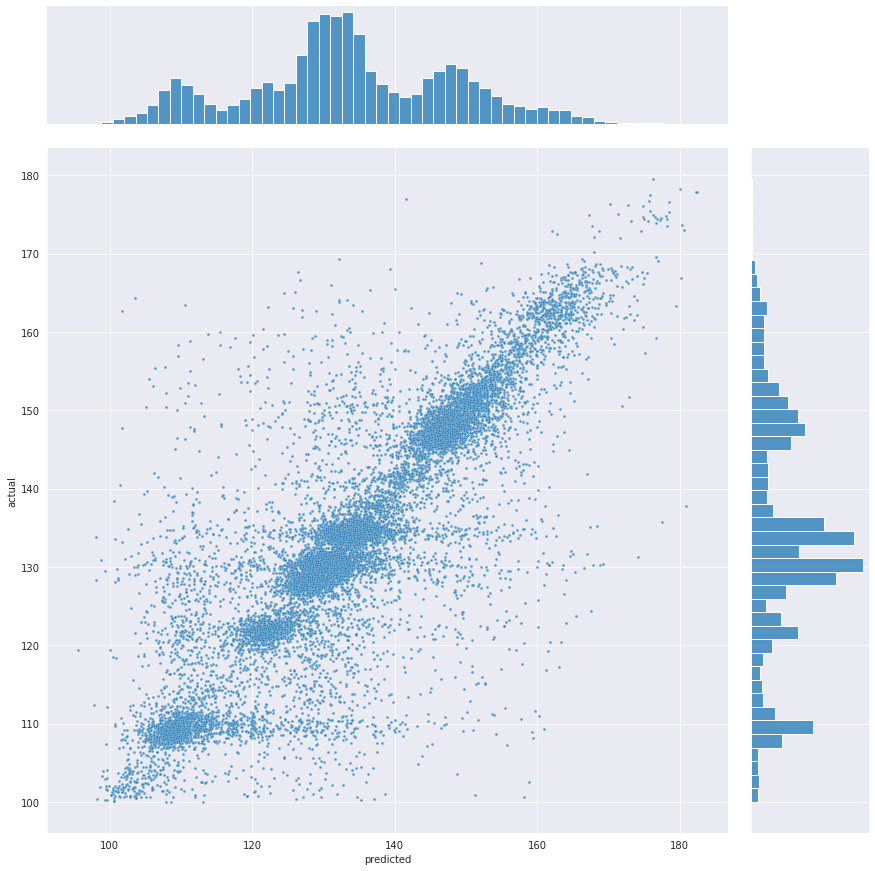

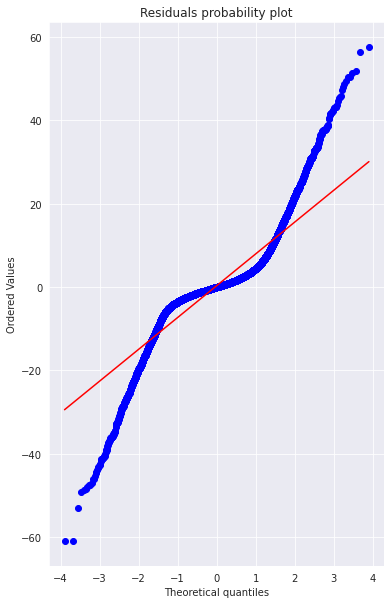

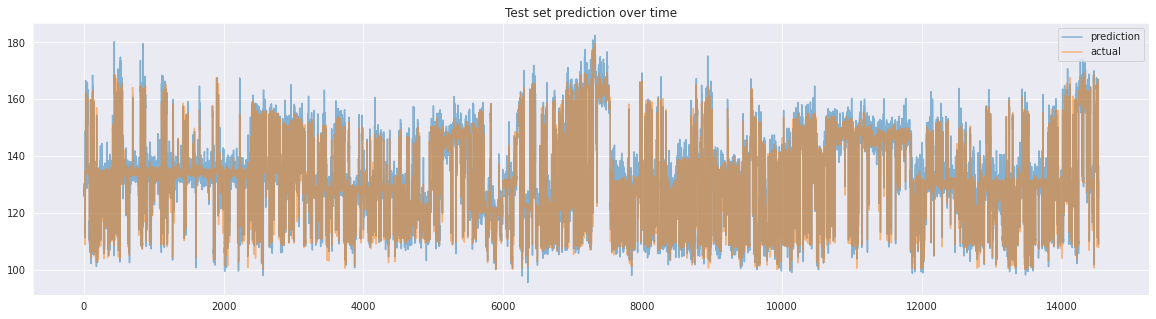

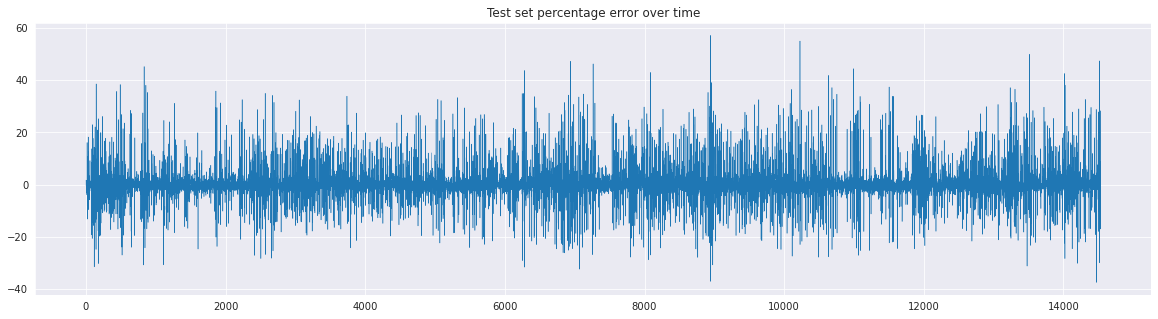

In [4]:
evaluate(y_test[1:].to_numpy(), y_pred.to_numpy())